In [ ]:
# Preparing the IMDB data

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

25000 train sequences
25000 test sequences


In [5]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [6]:
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
# Training the model with Embedding and SimpleRNN layers

In [10]:
from tensorflow.keras.layers import Dense,Embedding,SimpleRNN
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [13]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 56s 354ms/step - loss: 0.6227 - acc: 0.6444 - val_loss: 0.4900 - val_acc: 0.7744
Epoch 2/10
157/157 [==============================] - 56s 355ms/step - loss: 0.3946 - acc: 0.8357 - val_loss: 0.3833 - val_acc: 0.8404
Epoch 3/10
157/157 [==============================] - 56s 355ms/step - loss: 0.2886 - acc: 0.8860 - val_loss: 0.3262 - val_acc: 0.8704
Epoch 4/10
157/157 [==============================] - 55s 350ms/step - loss: 0.2287 - acc: 0.9140 - val_loss: 0.3732 - val_acc: 0.8344
Epoch 5/10
157/157 [==============================] - 56s 356ms/step - loss: 0.1860 - acc: 0.9297 - val_loss: 0.3618 - val_acc: 0.8470
Epoch 6/10
157/157 [==============================] - 56s 358ms/step - loss: 0.1434 - acc: 0.9482 - val_loss: 0.4528 - val_acc: 0.8162
Epoch 7/10
157/157 [==============================] - 56s 358ms/step - loss: 0.1031 - acc: 0.9641 - val_loss: 0.4537 - val_acc: 0.8020
Epoch 8/10
157/157 [==============================] - 5

In [16]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
# Plotting results

In [14]:
import matplotlib.pyplot as plt

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [18]:
epochs = range(1, len(acc) + 1)

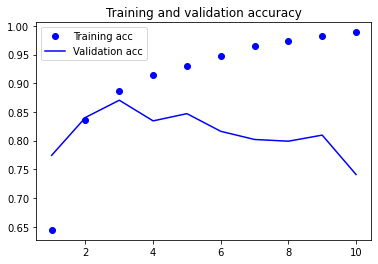

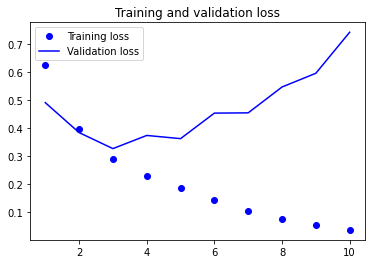

In [19]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
# SimpleRNN isn’t good at processing long sequences, such as text.

In [21]:
# Using the LSTM layer in Keras

In [22]:
from tensorflow.keras.layers import LSTM

In [23]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [25]:
history1 = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 7s 44ms/step - loss: 0.5145 - acc: 0.7564 - val_loss: 1.1591 - val_acc: 0.5362
Epoch 2/10
157/157 [==============================] - 6s 41ms/step - loss: 0.2956 - acc: 0.8814 - val_loss: 0.3236 - val_acc: 0.8612
Epoch 3/10
157/157 [==============================] - 6s 41ms/step - loss: 0.2269 - acc: 0.9154 - val_loss: 0.2962 - val_acc: 0.8878
Epoch 4/10
157/157 [==============================] - 6s 41ms/step - loss: 0.1997 - acc: 0.9269 - val_loss: 0.3190 - val_acc: 0.8690
Epoch 5/10
157/157 [==============================] - 7s 42ms/step - loss: 0.1745 - acc: 0.9380 - val_loss: 0.3067 - val_acc: 0.8958
Epoch 6/10
157/157 [==============================] - 6s 41ms/step - loss: 0.1551 - acc: 0.9449 - val_loss: 0.3467 - val_acc: 0.8486
Epoch 7/10
157/157 [==============================] - 7s 42ms/step - loss: 0.1431 - acc: 0.9498 - val_loss: 0.4435 - val_acc: 0.8644
Epoch 8/10
157/157 [==============================] - 7s 42ms/step - 

In [26]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

In [27]:
epochs = range(1, len(acc) + 1)

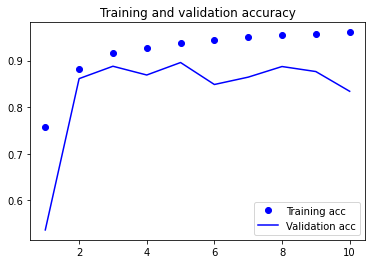

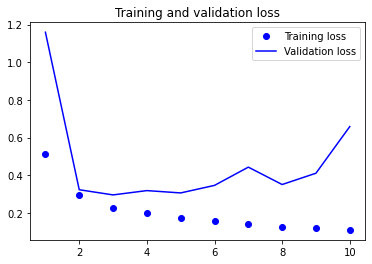

In [28]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# LSTM is better than SimpleRNN